In [1]:
from pathlib import Path
import numpy as np
import sys
sys.path.append('../../analyze')
sys.path.append('../../lib_processing')

In [2]:
import create_heatmap
import utils

In [3]:
root_embeddings = Path('../../data/embeddings').absolute().resolve()
root_text = Path('../../data/text').absolute().resolve()
ne1 = root_embeddings / 'w040_i020' / 'scriptures' / 'book_of_mormon' / '1-ne'
embeds = np.genfromtxt(ne1 / '003.embeddings.csv', delimiter=',')
offs = np.genfromtxt(ne1 / '003.offsets.csv', delimiter=',', dtype=int)
embed_means = np.genfromtxt(root_embeddings / '..' / 'means' / 'w040_i020' / 'scriptures' / 'mean.csv', delimiter='\n')
embeds_norm = embeds - embed_means
text = (root_text / 'scriptures' / 'book_of_mormon' / '1-ne' / '003.txt').read_text()

In [4]:
cos_sim = utils.cos_sim(embeds, embeds)
cos_sim_scipy = utils.cos_sim_scipy(embeds, embeds)

In [5]:
cos_sim_norm = utils.cos_sim(embeds_norm, embeds_norm)
cos_sim_norm_scipy = utils.cos_sim_scipy(embeds_norm, embeds_norm)

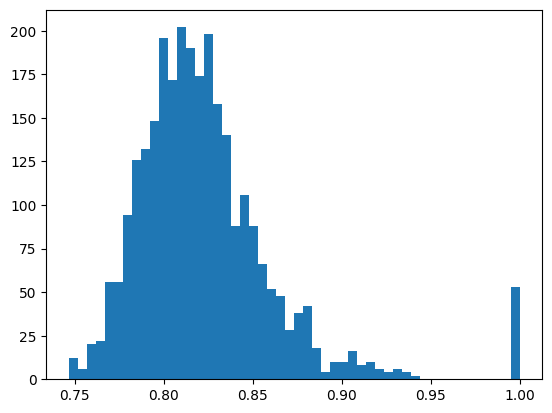

In [6]:
create_heatmap.create_heatmap(cos_sim, offs, offs, text, text, 0)

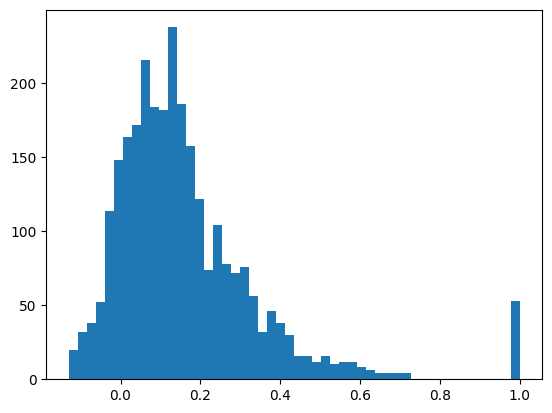

In [7]:
create_heatmap.create_heatmap(cos_sim_norm, offs, offs, text, text, 0)

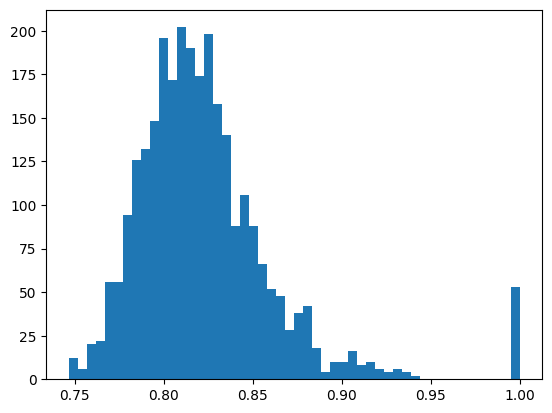

In [8]:
create_heatmap.create_heatmap(cos_sim_scipy, offs, offs, text, text, 0)

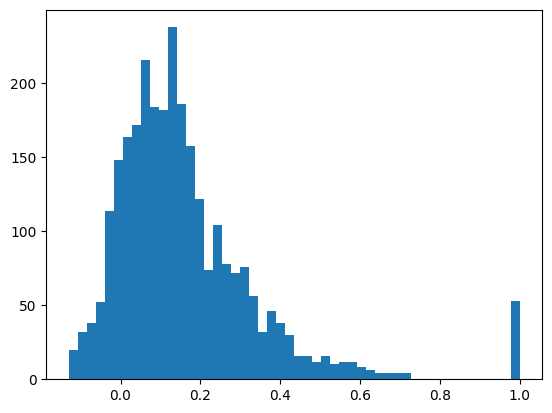

In [9]:
create_heatmap.create_heatmap(cos_sim_norm_scipy, offs, offs, text, text, 0)

In [16]:
cos_sim_cluster_max = create_heatmap.get_top_matches(cos_sim_norm, offs, offs, text, text, 0.5)

Number found:  28
////////////////////////////////////////////////////////////////////////////
Cosine Value:  1.0000000000000002
Verse  28
LINE 1:  it came to pass that Laman was angry with me, and also with my father; and also was Lemuel, for he hearkened unto the words of Laman. Wherefore Laman and Lemuel did speak many hard words unto us, their younger
--------------------------------------------
Verse  28
LINE 2:  it came to pass that Laman was angry with me, and also with my father; and also was Lemuel, for he hearkened unto the words of Laman. Wherefore Laman and Lemuel did speak many hard words unto us, their younger
////////////////////////////////////////////////////////////////////////////
Cosine Value:  1.0
Verse  31
LINE 1:  angel had departed, Laman and Lemuel again began to murmur, saying: How is it possible that the Lord will deliver Laban into our hands? Behold, he is a mighty man, and he can command fifty, yea, even he can slay
-----------------------------------------

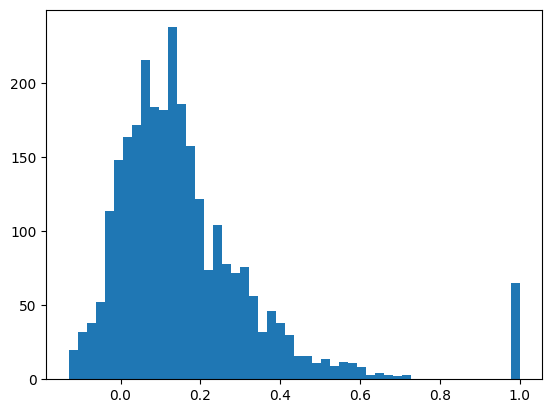

In [17]:
create_heatmap.create_heatmap(cos_sim_cluster_max, offs, offs, text, text, 0)